In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.preprocessing import sequence

In [ ]:
def create(model_name):
    m_name=eval(model_name)
    model=Sequential([
        Embedding(max_words, 64, input_length=max_length),
        m_name(64),Dense(1, activation='sigmoid')],name=model_name)
    return model

In [ ]:
def m_compile(model,xtr,ytr):
    size=256
    e=4
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(xtr, ytr, batch_size=size, epochs=e, validation_split=0.2)
    return history

In [ ]:
max_words = 10000
(xtr,ytr),(xt, yt) = imdb.load_data(num_words=max_words)
max_length = 250
xtr = sequence.pad_sequences(xtr, maxlen=max_length)
xt = sequence.pad_sequences(xt, maxlen=max_length)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
names=['SimpleRNN','GRU','LSTM']
models=[]
for i in names:
    m=create(i)
    models.append(m)

In [9]:
hist=[]
for i in models:
    x=m_compile(i,xtr,ytr)
    hist.append(x)

Epoch 1/4
79/79 [==============================] - 31s 371ms/step - loss: 0.0220 - accuracy: 0.9941 - val_loss: 0.7269 - val_accuracy: 0.7780
Epoch 2/4
79/79 [==============================] - 17s 212ms/step - loss: 0.0073 - accuracy: 0.9985 - val_loss: 0.6623 - val_accuracy: 0.8202
Epoch 3/4
79/79 [==============================] - 18s 231ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.6756 - val_accuracy: 0.8372
Epoch 4/4
79/79 [==============================] - 17s 212ms/step - loss: 0.0079 - accuracy: 0.9982 - val_loss: 1.0593 - val_accuracy: 0.6974
Epoch 1/4
79/79 [==============================] - 58s 700ms/step - loss: 0.0676 - accuracy: 0.9776 - val_loss: 0.4842 - val_accuracy: 0.8604
Epoch 2/4
79/79 [==============================] - 54s 685ms/step - loss: 0.0504 - accuracy: 0.9851 - val_loss: 0.5669 - val_accuracy: 0.8576
Epoch 3/4
79/79 [==============================] - 53s 671ms/step - loss: 0.0439 - accuracy: 0.9866 - val_loss: 0.6806 - val_accuracy: 0.8584
Epoch 

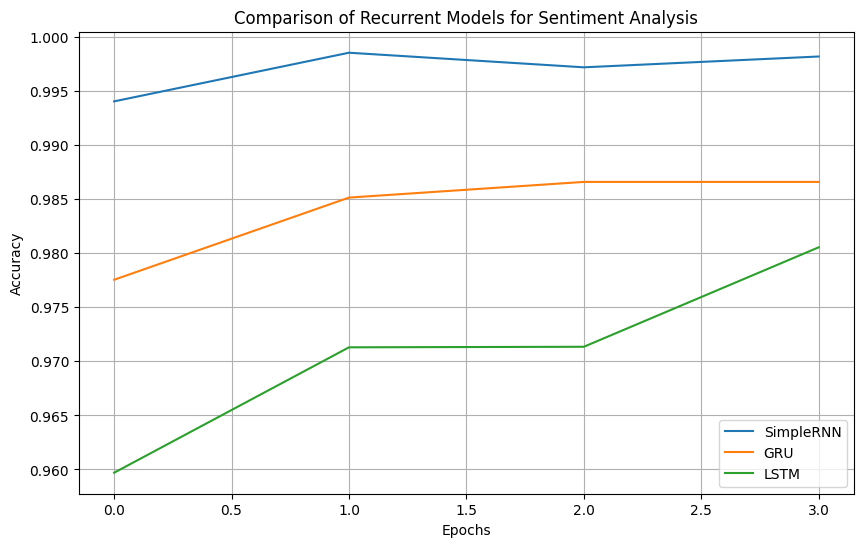

In [10]:
plt.figure(figsize=(10, 6))
for i, history in enumerate(hist):
    plt.plot(history.history['accuracy'], label=names[i])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Recurrent Models for Sentiment Analysis')
plt.legend()
plt.grid(True)
plt.show()